In [1]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import base64
from datetime import datetime
import matplotlib as mpl
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(23,12)})

In [2]:
dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv("persons.csv", dtype = {'value': float}, parse_dates=[0], date_parser=dateparse,)

df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
df['year'] = df['timestamp'].dt.year

df.set_index('timestamp', inplace=True)

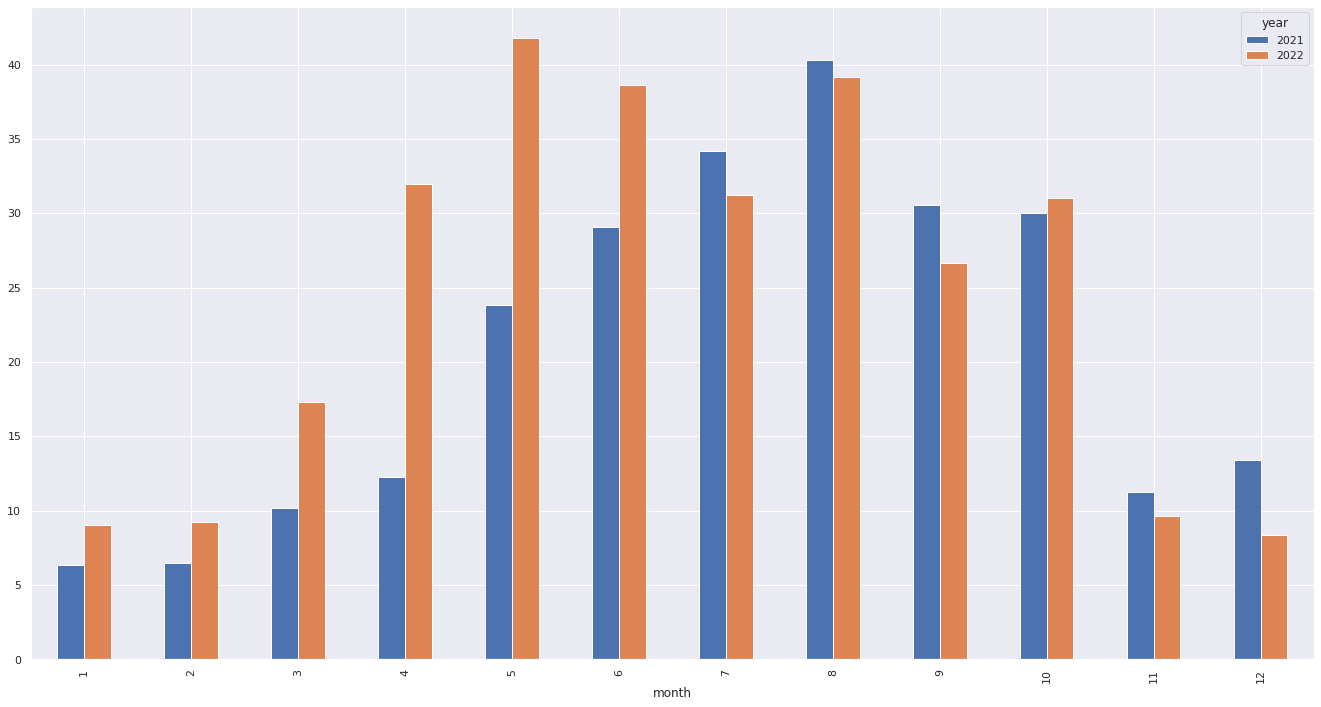

In [3]:
y=df[(df["hour"]>8) & (df["hour"]<18)].groupby(["year","month"]).mean()
pd.pivot_table(y, index="month", columns=["year"], values="value").plot(kind='bar')

figfn = "year.png"
plt.savefig(figfn)
encoded_str = None
with open(figfn, 'rb') as f:
    encoded_str = base64.b64encode(f.read())
    encoded_str = encoded_str.decode('utf-8')

metadata = {
     'outputs' :  [{
        'type': 'web-app',
        'storage': 'inline',
        'source': "<img src='data:image/png;base64,"+encoded_str+"'/>",
    }]
}

with open("mlpipeline-ui-metadata.json", "w", encoding="utf-8") as metadata_file:
    json.dump(metadata, metadata_file)